# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

random.seed(42)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# cities

In [4]:
# Create base url to scan API
url = "http://api.openweathermap.org/data/2.5/weather?&units=imperial"
base_url = f"{url}&appid={weather_api_key}"

In [5]:
# Create parameters
# cities = cities[0:10]
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

In [6]:
# Create a for loop to go through each city. 
# Include a try/except so code doesn't break.

for city in cities:
    my_city_url = base_url + '&q=' + city
#     print(my_city_url)

    try:
        response = requests.get(my_city_url).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        time.sleep(0.5)
        
    except (KeyError, ValueError):
        # Append null values
        print("Missing field...skipping.")
        pass
    
print(response)

Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing field...skipping.
Missing fiel

In [7]:
# Create a dataframe from the cities, lat, temp, humidity, cloudiness, and wind speed.
city_weather_df = pd.DataFrame({"City": city_name,
                                "City Latitude": lat,
                                "City Longitude": lng,
                                "Max Temperature": max_temp,
                                "Humidity": humidity,
                                "Cloud Coverage": cloudiness,
                                "Wind Speed": wind_speed,
                                "City Country": country,
                                "City Datetime": date
                               })


city_weather_df

,City,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
0,Yerofey Pavlovich,53.9667,121.9667,-4.77,84,100,4.50,RU,1613370631
1,Padilla,3.2204,-76.3139,71.60,83,75,2.30,CO,1613370632
2,Torbay,47.6666,-52.7314,24.01,79,90,10.36,CA,1613370430
3,Talnakh,69.4865,88.3972,-26.18,80,0,8.03,RU,1613370634
4,Leningradskiy,69.3833,178.4167,-15.20,87,0,4.43,RU,1613370447
...,...,...,...,...,...,...,...,...,...
555,Clonmel,52.3550,-7.7039,48.99,98,100,10.00,IE,1613371096
556,Winnemucca,40.9730,-117.7357,37.40,65,90,9.22,US,1613371096
557,Seoul,37.5683,126.9778,37.40,38,20,21.85,KR,1613371033
558,Polunochnoye,60.8697,60.4153,-14.93,87,69,2.71,RU,1613371098


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Export the city data into a .csv
city_weather_df.to_csv("City_Weather.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

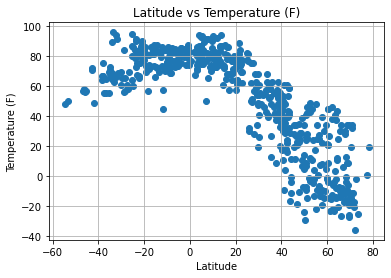

In [9]:
# Build a scatter plot for Latitude vs Temperature (F)
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature (F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

The "Latitude vs Temperature" scatter plot compares the latitude with the temperature of hundreds of cities around the world.

## Latitude vs. Humidity Plot

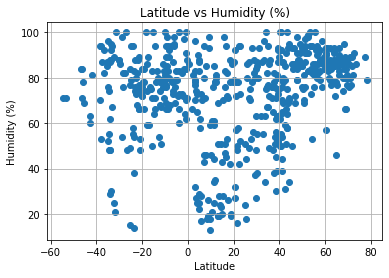

In [10]:
# Build a scatter plot for Latitude vs Humidity 
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity (%)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

The "Latitude vs Humidity" scatter plot compares the latitude with the humidity of hundreds of cities around the world.

## Latitude vs. Cloudiness Plot

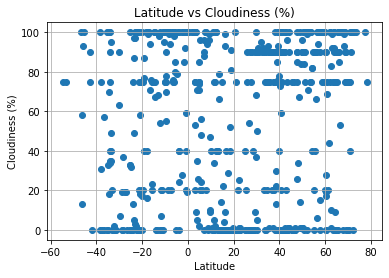

In [11]:
# Build a scatter plot for Latitude vs Cloudiness
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Cloud Coverage"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness (%)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

The "Latitude vs Cloudiness" scatter plot compares the latitude with the cloudiness in hundreds of cities around the world.

## Latitude vs. Wind Speed Plot

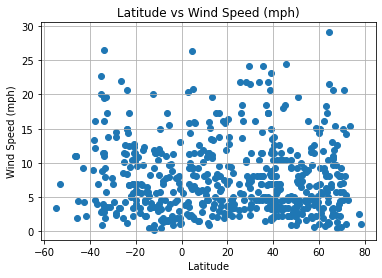

In [12]:
# Build a scatter plot for Latitude vs Wind Speed (mph)
plt.scatter(city_weather_df["City Latitude"], city_weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


The "Latitude vs Wind Speed" scatter plot compares the latitude with the wind speed in hundreds of cities around the world.

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
city_weather_df["Humidity"].max()


100

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_max_temp = northern_lats["Max Temperature"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_max_temp)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)


0      17.253120
1      89.567247
2      26.230843
3      -4.862793
4      -4.715732
         ...    
555    19.549813
556    35.769309
557    40.621050
558     7.416257
559     3.310938
Name: City Latitude, Length: 383, dtype: float64


In [16]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.43x +94.16


The r-value is 0.7449374954088238


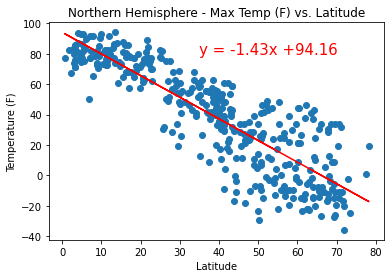

In [17]:
# Create plot
plt.scatter(north_latitude, north_max_temp)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(35, 80),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_max_temp = southern_lats["Max Temperature"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_max_temp)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

5      60.644754
7      73.812505
10     78.497035
12     74.966980
13     64.222401
         ...    
530    79.495973
536    75.012494
540    73.407618
541    75.409068
554    79.317700
Name: City Latitude, Length: 177, dtype: float64


In [19]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.42x +83.42


The r-value is 0.2586479460178218


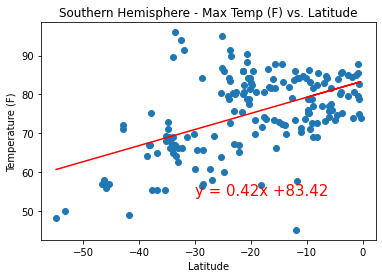

In [20]:
# Create plot
plt.scatter(south_latitude, south_max_temp)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.annotate(line_eq,(-30, 54),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [21]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_humidity = northern_lats["Humidity"]

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_humidity)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)

0      79.874905
1      53.809401
2      76.638900
3      87.846548
4      87.793540
         ...    
555    79.047066
556    73.200776
557    71.451974
558    83.420586
559    84.900341
Name: City Latitude, Length: 383, dtype: float64


In [22]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.51x +52.16


The r-value is 0.24412178687136485


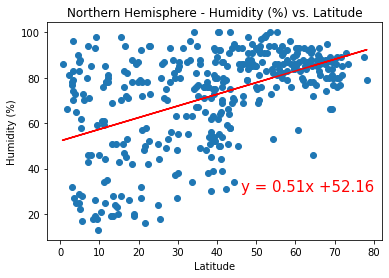

In [23]:
# Create plot
plt.scatter(north_latitude, north_humidity)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(46, 30),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [24]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_humidity = southern_lats["Humidity"]

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_humidity)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

5      67.215775
7      74.402311
10     76.958977
12     75.032387
13     69.168340
         ...    
530    77.504165
536    75.057227
540    74.181337
541    75.273664
554    77.406870
Name: City Latitude, Length: 177, dtype: float64


In [25]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.23x +79.65


The r-value is 0.02902897759635619


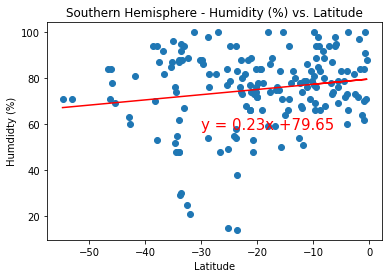

In [26]:
# Create plot
plt.scatter(south_latitude, south_humidity)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humdidty (%)')
plt.annotate(line_eq,(-30, 58),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [27]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_cloudiness = northern_lats["Cloud Coverage"]

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_cloudiness)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)

0      62.432758
1      37.835116
2      59.378986
3      69.955483
4      69.905460
         ...    
555    61.651538
556    56.134479
557    54.484159
558    65.778766
559    67.175190
Name: City Latitude, Length: 383, dtype: float64


In [28]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.48x +36.27


The r-value is 0.0588165887061304


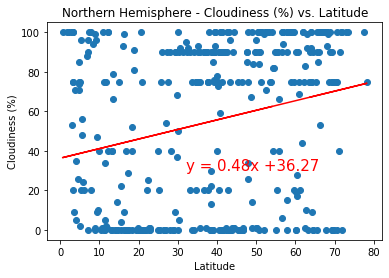

In [29]:
# Create plot
plt.scatter(north_latitude, north_cloudiness)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(32, 30),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [30]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_cloudiness = southern_lats["Cloud Coverage"]

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_cloudiness)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

5      31.983634
7      54.141637
10     62.024519
12     56.084327
13     38.003911
         ...    
530    63.705480
536    56.160916
540    53.460314
541    56.828250
554    63.405491
Name: City Latitude, Length: 177, dtype: float64


In [31]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.7x +70.31


The r-value is 0.05038544475535967


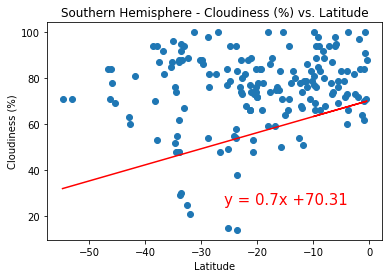

In [32]:
# Create plot
plt.scatter(south_latitude, south_humidity)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-26, 25),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
# Find Northern Hemisphere cities with a latitude greater than '0'
northern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] > 0)]

# Define variables
north_latitude = northern_lats["City Latitude"]
north_wind_speed = northern_lats["Wind Speed"]

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_latitude, north_wind_speed)

# Get regression values
regress_values_north = north_latitude * slope + intercept
print(regress_values_north)

0      7.538845
1      8.668221
2      7.679056
3      7.193447
4      7.195744
         ...   
555    7.574714
556    7.828024
557    7.903797
558    7.385217
559    7.321102
Name: City Latitude, Length: 383, dtype: float64


In [34]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.02x +8.74


The r-value is 0.007166680345779335


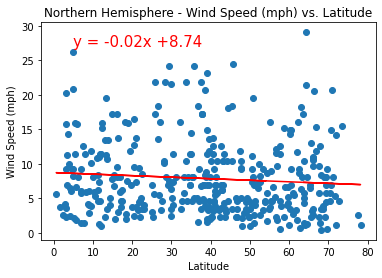

In [35]:
# Create plot
plt.scatter(north_latitude, north_wind_speed)
plt.plot(north_latitude,regress_values_north, "r-")

#Label plot and annotate the line equation
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(5, 27),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [36]:
# Find Southern Hemisphere cities with a latitude less than '0'
southern_lats = city_weather_df.loc[(city_weather_df['City Latitude'] < 0)]

# Define variables
south_latitude = southern_lats["City Latitude"]
south_wind_speed = southern_lats["Wind Speed"]

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_latitude, south_wind_speed)

# Get regression values
regress_values_south = south_latitude * slope + intercept
print(regress_values_south)

5      10.864077
7       7.987980
10      6.964787
12      7.735820
13     10.082649
         ...    
530     6.746599
536     7.725879
540     8.076416
541     7.639259
554     6.785537
Name: City Latitude, Length: 177, dtype: float64


In [37]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.09x +5.89


The r-value is 0.0479898133619158


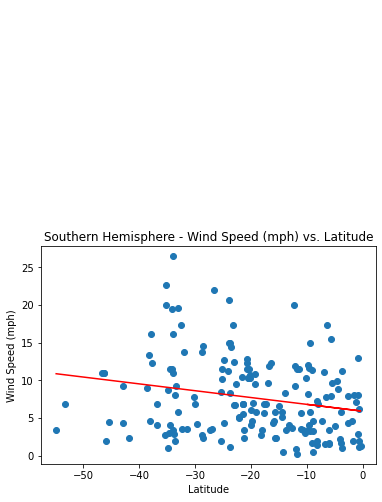

In [38]:
# Create plot
plt.scatter(south_latitude, south_wind_speed)
plt.plot(south_latitude,regress_values_south, "r-")

#Label plot and annotate the line equation
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-30, 58),fontsize=15,color="red")

# Print r value
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()